# 6.2.a ConvNet: CIFGAR10 image classifier

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/DSC650/assignment06')
!pwd

Mounted at /content/drive
/content/drive/My Drive/DSC650/assignment06


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from keras import layers, models
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
# get the size of the data sets
print(f'train_images: {trainX.shape}')
print(f'test_images: {testX.shape}')
print(f'train_labels: {trainy.shape}')
print(f'test_labels: {testy.shape}')

train_images: (50000, 32, 32, 3)
test_images: (10000, 32, 32, 3)
train_labels: (50000, 1)
test_labels: (10000, 1)


In [5]:
# Assignment classes for visualization
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat',
                   'deer', 'frog', 'horse', 'ship', 'truck']

Visualize sample images

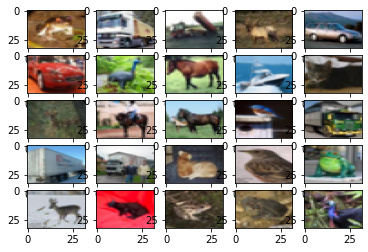

In [6]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
  for j in range(5):
    ax[i][j].imshow(trainX[k], aspect = 'auto')
    k += 1

plt.show()

In [7]:
# normalize datasets
train_images = trainX.astype('float32') / 255.0
test_images = testX.astype('float32') / 255.0

In [8]:
# convert labels to numeric
train_labels = to_categorical(trainy)
test_labels = to_categorical(testy)

Split training data into training and validation datasets

In [9]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [10]:
# get the size of the data sets
print(f'x_val: {x_val.shape}')
print(f'y_val: {y_val.shape}')
print(f'partial_x_train: {partial_x_train.shape}')
print(f'partial_y_train: {partial_y_train.shape}')

x_val: (10000, 32, 32, 3)
y_val: (10000, 10)
partial_x_train: (40000, 32, 32, 3)
partial_y_train: (40000, 10)


Build the Model

In [11]:
# Instantiate a convnet
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

Compile the Model

In [13]:
opt = SGD(lr = 0.001, momentum = 0.9)

model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Train the model

In [15]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs = 30, batch_size = 64,
                    validation_data=(x_val, y_val), verbose = 1)

Epoch 1/30
625/625 [==============================] - 5s 8ms/step - loss: 0.0087 - accuracy: 0.9982 - val_loss: 2.1163 - val_accuracy: 0.7056
Epoch 2/30
625/625 [==============================] - 5s 8ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 2.1002 - val_accuracy: 0.7178
Epoch 3/30
625/625 [==============================] - 5s 8ms/step - loss: 8.5766e-04 - accuracy: 1.0000 - val_loss: 2.1715 - val_accuracy: 0.7185
Epoch 4/30
625/625 [==============================] - 5s 8ms/step - loss: 6.1604e-04 - accuracy: 1.0000 - val_loss: 2.2206 - val_accuracy: 0.7185
Epoch 5/30
625/625 [==============================] - 5s 8ms/step - loss: 5.1373e-04 - accuracy: 1.0000 - val_loss: 2.2542 - val_accuracy: 0.7185
Epoch 6/30
625/625 [==============================] - 5s 8ms/step - loss: 4.4353e-04 - accuracy: 1.0000 - val_loss: 2.2857 - val_accuracy: 0.7177
Epoch 7/30
625/625 [==============================] - 5s 8ms/step - loss: 3.9602e-04 - accuracy: 1.0000 - val_loss: 2.3142 - val_acc

Plot Training and Validation Loss

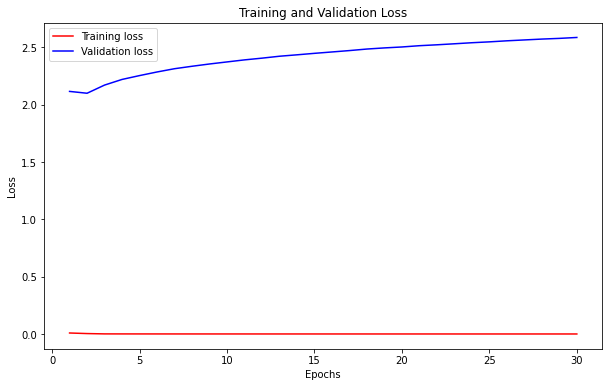

In [16]:
plt.figure(figsize = (10, 6))

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

fig = plt.gcf()
fig.savefig('results/CIFGAR10/no/train_val_loss.png')

plt.show()

Plot Training and Validation accuracy

<Figure size 432x288 with 0 Axes>

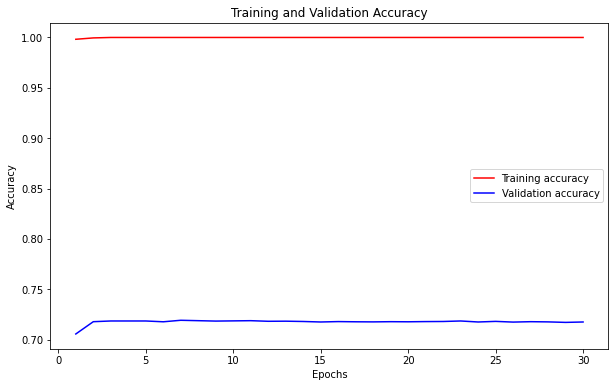

In [17]:
plt.clf()

plt.figure(figsize = (10, 6))

acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

fig = plt.gcf()
fig.savefig('results/CIFGAR10/no/train_val_accuracy.png')

plt.show()

Evaluate the Model

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 2.7986 - accuracy: 0.7098


In [19]:
print(f'Test accuracy: {test_acc * 100:.1f}%')
print(f'Test loss: {test_loss:.3f}')

Test accuracy: 71.0%
Test loss: 2.799


Predicting the test data

In [20]:
label_pred_test = model.predict(test_images)
label_pred_test_classes = np.argmax(label_pred_test, axis = 1)
label_pred_test_max_probability = np.max(label_pred_test, axis = 1)

313/313 [==============================] - 1s 3ms/step


In [21]:
# Reverse test_labels from categorical
test_labels = np.argmax(test_labels, axis = 1)

Visualize predictions

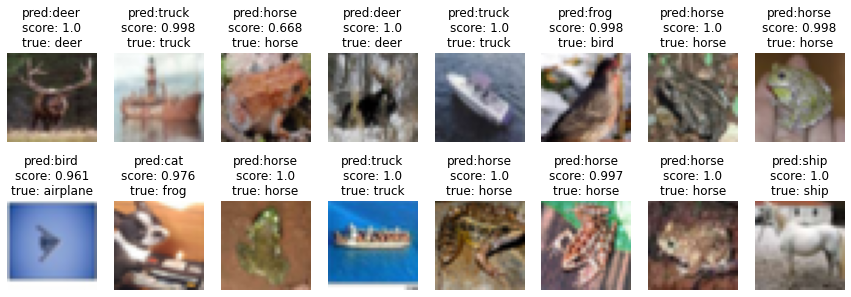

In [22]:
cols = 8
rows = 2

fig = plt.figure(figsize = (2 * cols - 1, 3 * rows - 1))

for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(test_labels))

    ax = fig.add_subplot(rows, cols, i * rows + j + 1)

    ax.grid('off')
    ax.axis('off')

    ax.imshow(test_images[random_index, :])

    pred_label = cifar10_classes[label_pred_test_classes[random_index]]
    pred_probability = label_pred_test_max_probability[random_index]

    true_label = cifar10_classes[test_labels[random_index]]

    ax.set_title(f'pred:{pred_label}\nscore: {pred_probability:.3}\ntrue: {true_label}')

Save Model and Results

In [23]:
model.save('results/CIFGAR10/no/mnist.h5', history)

In [24]:
pickle.dump({'test_accuracy': test_acc, 
            'test_loss': test_loss, 
            'history_dict': history.history},
            open("results/CIFGAR10/no/training_metrics", "wb"))